# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy

# Functions

Calculate euclidean distance between two points

In [2]:
def eucl_dist(A, B):
    squares = [(a - b)**2 for a, b in zip(A, B)]
    return(sum(squares)**0.5)

# K-means Example in 2-D

In [3]:
# set number of points to cluster
num_pts = 500

In [4]:
# set number of groups for clustering the dataset
k = 4

## Data

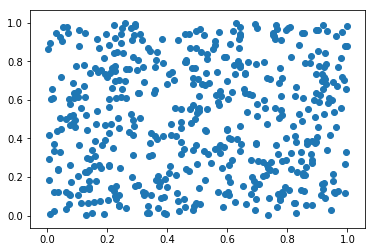

In [5]:
# generate random points
points = np.random.rand(num_pts, 2)
plt.scatter(points[:, 0], points[:, 1]);

## Initialize Cluster Centroids

In [6]:
# set all points to one cluster
clusters = np.zeros(len(points))

In [7]:
# set initial cluster centroids as k random points from dataset
centroids = np.array(random.choices(points, k=k))
centroids

array([[0.48437565, 0.02748436],
       [0.75803017, 0.23075846],
       [0.61577795, 0.63992548],
       [0.28757884, 0.82150196]])

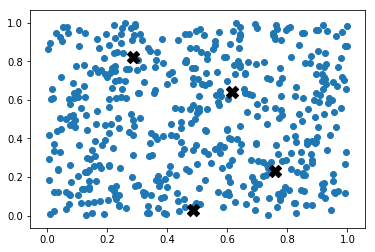

In [8]:
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=150);

## Assign Points to Clusters

In [9]:
# determine nearest cluster for each point
for i, point in enumerate(points):
    dist_list = []
    for j, centroid in enumerate(centroids):
        euc_d = eucl_dist(point, centroid)
        dist_list.append(euc_d)
        # assign point to nearest cluster
        if euc_d == min(dist_list):
            clusters[i] = j
clusters

array([3., 1., 2., 2., 0., 1., 0., 2., 1., 3., 1., 3., 2., 2., 1., 3., 2.,
       2., 3., 2., 3., 3., 1., 3., 3., 2., 0., 3., 1., 1., 2., 3., 2., 2.,
       2., 2., 2., 1., 1., 3., 2., 0., 0., 3., 0., 2., 2., 3., 3., 0., 2.,
       2., 1., 3., 2., 2., 0., 0., 1., 0., 2., 2., 2., 1., 2., 2., 2., 1.,
       3., 3., 2., 3., 1., 2., 2., 2., 1., 1., 2., 2., 3., 1., 1., 3., 2.,
       0., 2., 2., 0., 0., 2., 2., 3., 0., 3., 3., 1., 1., 3., 1., 0., 1.,
       0., 1., 3., 2., 2., 2., 2., 2., 2., 0., 2., 1., 3., 2., 1., 2., 3.,
       0., 1., 2., 2., 2., 1., 0., 1., 3., 2., 0., 0., 1., 3., 0., 2., 2.,
       1., 1., 2., 3., 2., 3., 0., 2., 3., 0., 3., 1., 0., 1., 3., 3., 0.,
       1., 3., 2., 1., 1., 2., 0., 3., 2., 3., 3., 1., 3., 2., 0., 2., 2.,
       1., 0., 2., 3., 0., 1., 3., 3., 2., 2., 1., 2., 0., 3., 3., 2., 3.,
       0., 2., 3., 1., 3., 3., 0., 3., 2., 2., 0., 1., 3., 3., 3., 3., 3.,
       3., 2., 0., 0., 0., 0., 0., 0., 0., 2., 1., 3., 3., 2., 3., 1., 3.,
       2., 2., 1., 1., 1.

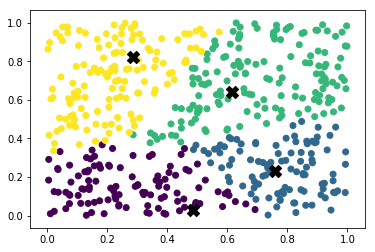

In [10]:
plt.scatter(points[:, 0], points[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=150);

## Update Cluster Centroids

In [11]:
# calculate average centroid for each cluster group of points
for clust_num in range(len(centroids)):
    centroids[clust_num, 0] = np.mean(points[clusters == clust_num][:, 0])
    centroids[clust_num, 1] = np.mean(points[clusters == clust_num][:, 1])
centroids

array([[0.27860465, 0.15025031],
       [0.77596837, 0.24661836],
       [0.70495597, 0.70119178],
       [0.22278235, 0.72142468]])

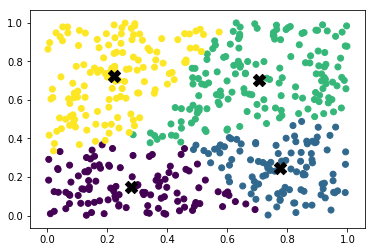

In [12]:
plt.scatter(points[:, 0], points[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=150);

## Iterate

In [13]:
# set iteration tolerance
it_tol = 0.01

In [14]:
old_centroids = np.zeros(centroids.shape)

while max(np.array(list(map(eucl_dist, old_centroids, centroids)))) > it_tol:
    
    old_centroids = deepcopy(centroids)
    
    for i, point in enumerate(points):
        dist_list = []
        for j, centroid in enumerate(centroids):
            euc_d = eucl_dist(point, centroid)
            dist_list.append(euc_d)
            if euc_d == min(dist_list):
                clusters[i] = j
            
    for clust_num in range(len(centroids)):
        centroids[clust_num, 0] = np.mean(points[clusters == clust_num][:, 0])
        centroids[clust_num, 1] = np.mean(points[clusters == clust_num][:, 1])

## Final Clusters

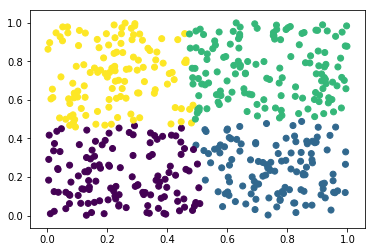

In [15]:
plt.scatter(points[:, 0], points[:, 1], c=clusters);

## Optimal Number of Clusters

In [16]:
# set max number of clusters
K = 10

In [17]:
SE_list = []

for k in range(1, K+1):
    
    old_centroids = np.zeros(centroids.shape)
    clusters = np.zeros(len(points))
    centroids = np.array(random.choices(points, k=k))

    while max(np.array(list(map(eucl_dist, old_centroids, centroids)))) > it_tol:

        old_centroids = deepcopy(centroids)

        for i, point in enumerate(points):
            dist_list = []
            for j, centroid in enumerate(centroids):
                euc_d = eucl_dist(point, centroid)
                dist_list.append(euc_d)
                if euc_d == min(dist_list):
                    clusters[i] = j

        for clust_num in range(len(centroids)):
            centroids[clust_num, 0] = np.mean(points[clusters == clust_num][:, 0])
            centroids[clust_num, 1] = np.mean(points[clusters == clust_num][:, 1])
            
    for clust_num, centroid in enumerate(centroids):
        dist_list = []
        for point in points[clusters == clust_num]:
            dist_list.append(eucl_dist(point, centroid))
    SE_list.append(sum(dist_list))

/home/kevcon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kevcon/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


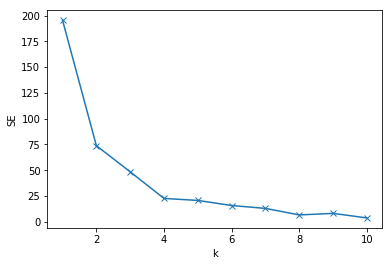

In [18]:
# select k value at "elbow" in plot
plt.plot(range(1, K+1), SE_list, marker='x')
plt.xlabel('k')
plt.ylabel('SE');

# Sklearn Kmeans

In [19]:
from sklearn.cluster import KMeans

In [20]:
# create instance of kmeans model with input for number of clusters
km = KMeans(n_clusters=4)

In [21]:
# fit model to data set
km.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
# output group assignment from model
km.labels_

array([0, 1, 3, 0, 2, 1, 2, 3, 1, 2, 1, 0, 3, 3, 1, 0, 0, 3, 0, 3, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 3, 2, 2, 3, 3, 1, 1, 0, 3, 2, 2, 0,
       2, 3, 1, 0, 0, 1, 3, 3, 1, 2, 3, 2, 2, 1, 1, 2, 3, 3, 3, 1, 3, 0,
       3, 1, 0, 0, 3, 0, 1, 2, 3, 0, 1, 1, 3, 3, 0, 1, 1, 0, 3, 2, 3, 3,
       2, 2, 3, 3, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 3, 3, 3, 0, 1,
       3, 2, 3, 1, 0, 3, 1, 3, 2, 2, 1, 1, 3, 2, 1, 2, 1, 0, 3, 2, 2, 1,
       0, 2, 3, 3, 1, 1, 0, 0, 0, 0, 2, 3, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1,
       0, 3, 1, 1, 2, 2, 2, 3, 0, 0, 1, 0, 3, 2, 3, 3, 1, 2, 3, 0, 2, 1,
       3, 0, 3, 3, 1, 3, 2, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 2, 0, 3, 3, 2,
       1, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 0, 0, 3, 0, 1,
       0, 0, 3, 1, 1, 1, 3, 0, 2, 2, 3, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 3,
       2, 3, 2, 0, 2, 1, 1, 1, 3, 3, 1, 3, 3, 2, 0, 0, 1, 0, 1, 3, 3, 2,
       2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 2, 1, 0, 0, 2,
       3, 2, 3, 3, 2, 2, 3, 3, 3, 0, 2, 3, 1, 2, 0,

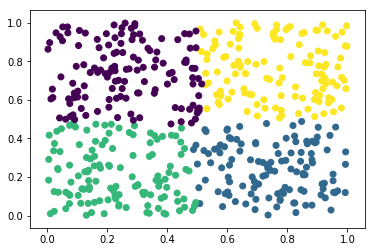

In [23]:
plt.scatter(points[:, 0], points[:, 1], c=km.labels_);